---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib notebook

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    ans = len(df['Class'][df['Class'] == 1]) / len(df['Class'])
    
    return ans
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7681,-1.332095,0.828224,1.280394,-0.000192,0.006864,0.193420,0.065110,-0.694045,0.020374,0.275932,...,-0.361099,0.632575,-0.286266,0.283056,0.019710,-0.570700,0.409895,-0.669576,-0.374803,4.00
21329,1.900589,-0.850905,-0.856684,0.419809,-0.329338,0.512227,-0.644830,0.083636,-0.622460,1.100660,...,-0.393216,-0.234496,-0.263067,0.151624,0.170524,-0.142015,-0.703641,0.049886,-0.021393,96.00
14695,2.242056,-1.496697,-1.006464,-1.448708,-1.440162,-1.035270,-1.011986,-0.251838,-1.060550,1.598898,...,-0.443243,-0.170011,-0.090092,0.194057,-0.155795,-0.199022,-0.153737,-0.005144,-0.049103,50.00
12338,-0.308109,1.107050,-0.184132,-0.528948,1.000317,-0.517253,0.935125,0.012976,-0.150110,-1.081891,...,0.055325,0.044064,0.465492,-0.370183,-0.561096,-0.152336,0.590986,0.376048,0.248322,3.79
17768,-1.405410,1.985541,-1.290536,-1.672087,1.133642,-1.327069,1.839333,-0.605819,1.243372,2.321808,...,0.881069,-0.058432,0.731687,-0.273287,-0.427056,-0.032592,0.073411,0.779993,0.247911,1.54
10287,-0.699884,0.609707,1.648291,-0.111775,-0.012082,0.029178,1.044006,-0.189129,0.490403,0.445474,...,0.260821,-0.318068,-0.363937,-0.196931,-0.018100,-0.062046,0.197986,0.100994,-0.233207,66.61
14952,-0.707471,-0.187691,-0.134621,3.255101,-1.148874,0.332463,2.917763,-0.422476,-1.822643,0.423494,...,1.285348,0.523324,0.566754,1.394215,0.339234,-0.849506,0.061834,0.047024,0.289395,577.41
6674,0.990395,-0.652805,1.132151,0.488136,-1.108768,0.143529,-0.759598,0.138820,2.610924,-0.883965,...,-0.019788,-0.310486,-0.606868,0.050269,0.080245,-0.024059,0.926279,-0.067448,0.018929,101.85
7068,1.227096,0.752255,-0.175085,1.480037,0.195701,-1.187588,0.391541,-0.398004,1.050029,-0.819224,...,-0.110808,-0.229693,-0.369660,-0.115734,0.242780,0.714530,-0.398649,-0.009853,0.037848,16.71
18228,-0.623777,0.883194,1.527313,2.115177,0.051500,0.692841,-4.381942,-4.879574,-0.102227,-0.686115,...,1.222959,-2.462929,0.802206,-1.917197,0.174124,-0.269775,-0.154913,0.280197,0.380701,1.00


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dum = DummyClassifier().fit(X_train, y_train)
    y_dum_pred = dum.predict(X_test)
    acc = dum.score(X_test, y_test)
    recall = recall_score(y_dum_pred, y_test)
    
    return (acc, recall)
answer_two()

(0.96644542772861353, 0.04878048780487805)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [48]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc = SVC().fit(X_train, y_train)
    y_svc_pred = svc.predict(X_test)
    acc = svc.score(X_test, y_test)
    recall = recall_score(y_test, y_svc_pred)
    precision = precision_score(y_test, y_svc_pred)
    
    return (acc, recall, precision)
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    y_scores = svc.decision_function(X_test)
    confusion = confusion_matrix(y_test, np.greater(y_scores, -220),)
    
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [45]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve
    from sklearn.metrics import precision_recall_curve

    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    y_scores = lr.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)
    ans1 = recall[precision.tolist().index(0.75)]
    ans2 = tpr_lr[27]
    
    return (ans1, ans2)
answer_five()

(0.82499999999999996, 0.94999999999999996)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [46]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train, y_train)
    ans = grid_lr.cv_results_['mean_test_score'].reshape(5, 2)
    
    return ans
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


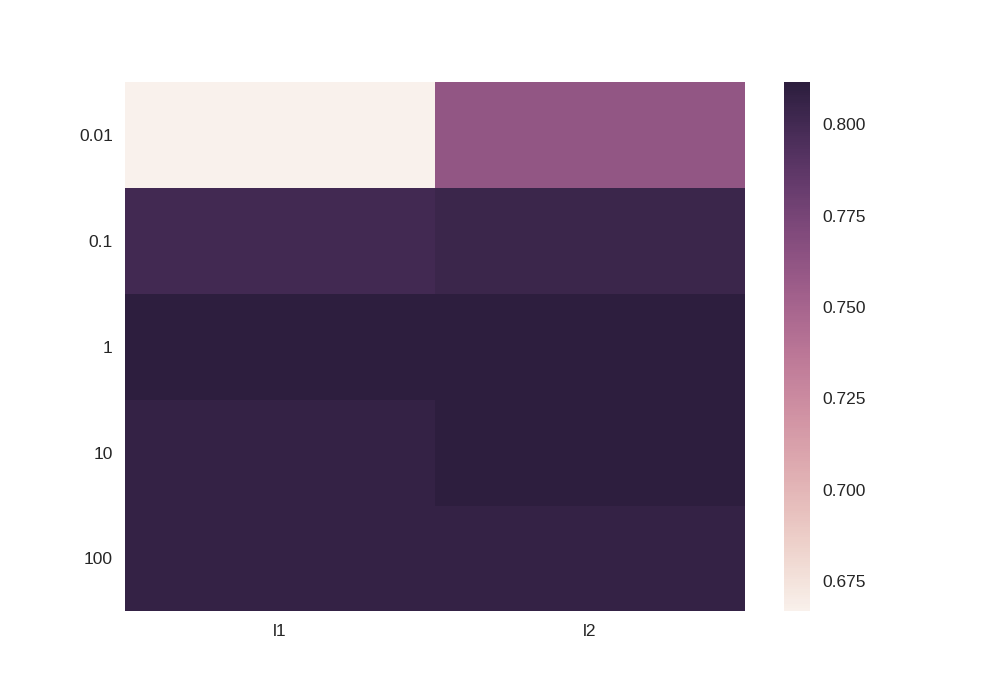

In [47]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())